In [30]:
# This code evaluates a policy for a sequence of trials 
# where the true choice does not change across trials. 
# The beliefs are not normative, but are defined arbitrarily,
# and are related to the reward via an arbitrary logit function.

# The second part can use the evaluation to find the optimal 
# policy in a finite sequence of trials. 



import numpy as np
import math 
from matplotlib import pyplot as plt
import seaborn as sns

#Define the number of trials and belief states.
trials = 5
num_states = 10

#Define tolerance
theta = 0.0000001

#other parameters
alpha = 1.0

#cost of observation
cost = 0.02

#transtition probability
up = 0.4


states = np.arange(-10,10.1,20/num_states)

initial_action = np.ones([num_states,trials])

print(initial_action[0,1])

def reward_probability(belief):
    p = 1/(1+math.exp(-alpha*belief))
    return p

def transition_probability(sign):
    if sign == 1:
        return up
    if sign == -1:
        return 1-up


value = np.zeros([num_states,trials])
              

1.0


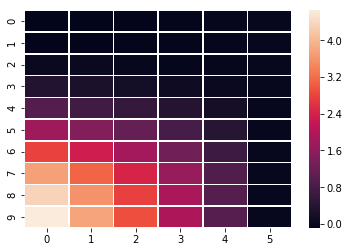

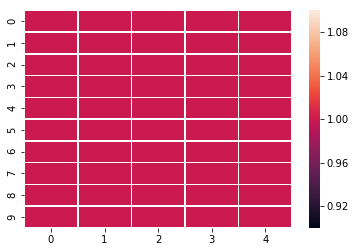

[[-0.08462497 -0.07353189 -0.05781123 -0.03933528 -0.01983862  0.        ]
 [-0.05239677 -0.05166802 -0.04751633 -0.03592861 -0.01898371  0.        ]
 [ 0.05958514  0.02676521  0.00500607 -0.01232864 -0.01260431  0.        ]
 [ 0.34418477  0.25797565  0.16969828  0.09791885  0.02916474  0.        ]
 [ 0.93456396  0.74740225  0.56451817  0.36982681  0.19079173  0.        ]
 [ 1.78409039  1.47246711  1.13697889  0.78743783  0.40384058  0.        ]
 [ 2.80024321  2.32952115  1.82478908  1.27810555  0.67280552  0.        ]
 [ 3.74183756  3.10989356  2.43632075  1.69880216  0.9074892   0.        ]
 [ 4.35517078  3.59158918  2.7688273   1.90492057  0.96907413  0.        ]
 [ 4.6534963   3.80040127  2.9018065   1.95117968  0.97838229  0.        ]]


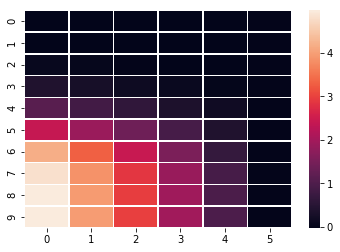

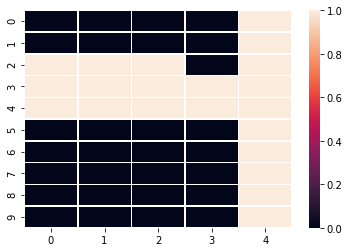

In [31]:
# This is the evaluation with no discounting and no change between trials

def evaluate(action,states):
    #Initialize values. The value of the last trial is zero, because that is a terminal, non-rewarding state. 
    value = np.zeros([num_states,trials+1])
    value[num_states-1,trials-1] = 0
    
    #Implement policy evaluation
    Delta = 1
   
    n = 1
    while Delta > theta:
        Delta = 0
        for j in range(trials):
            for i in range(num_states):          
                val = value[i,j]
                if action[i,j] == 0:
                    value[i,j] = reward_probability(states[i]) + value[i,j+1]
                elif i == 0:
                    value[i,j] = transition_probability(1)*(reward_probability(states[i+1]) + value[i+1,j+1] - cost) + \
                                 transition_probability(-1)*(reward_probability(states[i]) + value[i,j+1] - cost)
                elif i == num_states-1:
                    value[i,j] = transition_probability(1)*(reward_probability(states[i]) + value[i,j+1] - cost) + \
                                 transition_probability(-1)*(reward_probability(states[i-1]) + value[i-1,j+1] - cost)
                else:
                    value[i,j] = transition_probability(1)*(reward_probability(states[i+1]) + value[i+1,j+1] - cost) + \
                                 transition_probability(-1)*(reward_probability(states[i-1]) + value[i-1,j+1] - cost)
                Delta = max(Delta,abs(val - value[i,j])) 
    return value


def maximize(action,i,j,value=None):
    if value is None:
        value = np.zeros([num_states,trials+1])
    
    current_action = action[i,j]
    
    #evaluate alternative
    if current_action == 1:
            value_alternative = reward_probability(states[i]) + value[i,j+1]
    elif i == 0:
            value_alternative = transition_probability(1)*(reward_probability(states[i+1]) + value[i+1,j+1] - cost) + \
                                 transition_probability(-1)*(reward_probability(states[i]) + value[i,j+1] - cost)
    elif i == num_states-1:
            value_alternative = transition_probability(1)*(reward_probability(states[i]) + value[i,j+1] - cost) + \
                                 transition_probability(-1)*(reward_probability(states[i-1]) + value[i-1,j+1] - cost)
    else:
            value_alternative = transition_probability(1)*(reward_probability(states[i+1]) + value[i+1,j+1] - cost) + \
                                 transition_probability(-1)*(reward_probability(states[i-1]) + value[i-1,j+1] - cost)
    
    if value_alternative > value[i,j]:
            #Flip action if not the best through modding by 1
            current_action = (current_action+1)%1
    return current_action

def improve(action,value=None):
    if value is None:
        value = np.zeros([num_states,trials+1])
    
    stable = 1
    for j in range(trials-1):
            for i in range(num_states):
                old_action = action[i,j]
                action[i,j] = maximize(action,i,j,value)
                if old_action != action[i,j]:
                    stable = 0
    return action,stable


def best_action(initial_action,states=None):
    states =  np.arange(-10,10.1,20/num_states)
    
    stable = 0
    action = initial_action
    while stable == 0:
        value = evaluate(action,states)  
        action,stable = improve(action,value)
    return action, value


action = initial_action
value = evaluate(action,states)

ax = sns.heatmap(value, linewidth=0.5)
plt.show()

act = sns.heatmap(action, linewidth=0.5)
plt.show()


print(value)

action,value = best_action(action,value)


ax = sns.heatmap(value, linewidth=0.5)
plt.show()

act = sns.heatmap(action, linewidth=0.5)
plt.show()



In [134]:
i = 2
j = 3

print(value[i,j])

value[i,j] = transition_probability(1)*(reward_probability(states[i+1]) + value[i+1,j+1] - cost) + \
                                 transition_probability(-1)*(reward_probability(states[i-1]) + value[i-1,j+1] - cost)
    
print(value)

0.36039186151593094
[[-0.55894288 -0.52601002 -0.4921986  -0.45436965 -0.41494231 -0.36822661
  -0.31859872 -0.25595189 -0.18794714 -0.09922643  0.        ]
 [-0.33059886 -0.30503143 -0.27414854 -0.24971137 -0.215612   -0.19319083
  -0.15327024 -0.13401988 -0.08387486 -0.06420734  0.        ]
 [ 0.31918429  0.33938501  0.34571647  0.36039186  0.34985199  0.35451323
   0.31345206  0.30034478  0.2058349   0.16596996  0.        ]
 [ 1.23006372  1.22245442  1.21773009  1.18181488  1.15116768  1.06371871
   0.98610812  0.80432005  0.64362408  0.28270026  0.        ]
 [ 2.38132822  2.36597987  2.32584212  2.27585177  2.18072743  2.06769387
   1.87200671  1.64388838  1.2584512   0.81581617  0.        ]]


In [145]:
(1+1)%1

0

In [23]:
np.absolute(-1)

1